# Y1 5800K

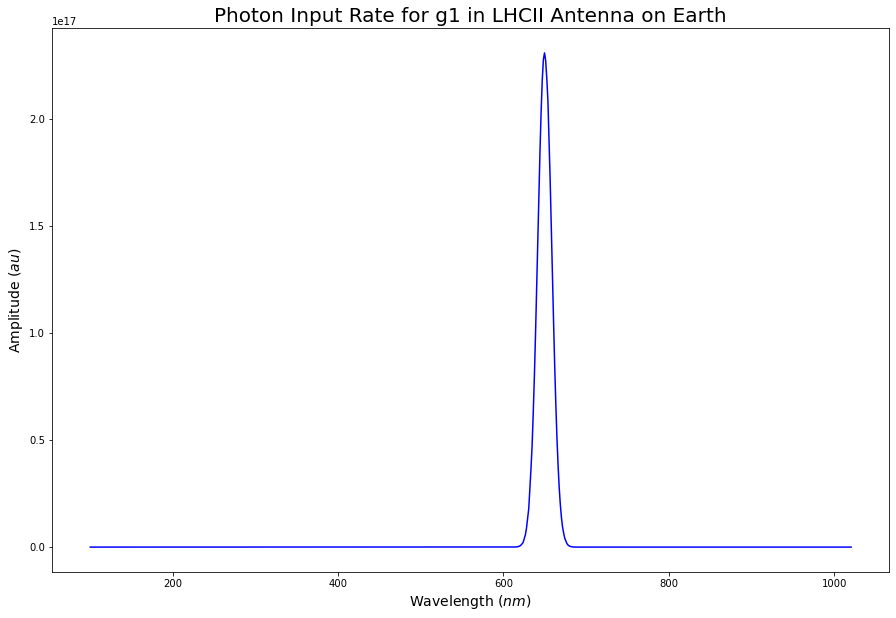

Photon Input Rate for LHCII g1 2.126394267616823


In [2]:
import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from numpy import trapz
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
           FormatStrFormatter, AutoMinorLocator)
import math
import pandas as pd 

hc = 1.98644568E-25

res = 1

s_5800K_1 = []
s_5800K_2 = [] 


counter = 1

with open('fp_5800K.txt') as fp5800K, open('g1_LHCII_spectra_interp.txt') as g1_LHCII_spectra_interp, open('y1_5800_LHCII.txt', mode = 'w') as y1_5800_LHCII:
    for line1, line2 in zip(fp5800K, g1_LHCII_spectra_interp): #zip() aggregates your separate files in the brackets
        line1, line2 = line1.rstrip(), line2.rstrip() 
        col1, col2 = line1.split('\t'), line2.split('\t') #creates column 1 (wavelength, fp spectra) and column 2 (wavelength, LHCII absorption spectra)
        
        wavelength_5800K = float(col1[0]) #1st element in column 1 (could also do col2[0]) 
        product_5800K = float(col1[1])*float(col2[1])*((float(col1[0])*1E-9)/hc) #2nd element in column 1 (fp spectra) x 2nd element in column 2 (absorption spectra) x wavelength in SI units/hc
        
        counter = counter + 1 
                                        
        if counter%res == 0: 
            s_5800K_1.append(wavelength_5800K) 
            s_5800K_2.append(product_5800K) 
            
#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Photon Input Rate for g1 in LHCII Antenna on Earth', fontsize=20) 
ax.set_ylabel('Amplitude ($au$)', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(s_5800K_1,s_5800K_2,linestyle='-',color='b')

plt.savefig('Y1_5800K.pdf') 
plt.show() 

#Calculate Y1 (photon input rate for g1 domain)
int1 = np.trapz(s_5800K_2, s_5800K_1)

A1 = 0.43
A2 = 0.75
sigma = 7.5E-19 #metres squared
B = A1/A2 

y1 = sigma*B*int1
print('Photon Input Rate for LHCII g1', y1)

# Y2 5800K

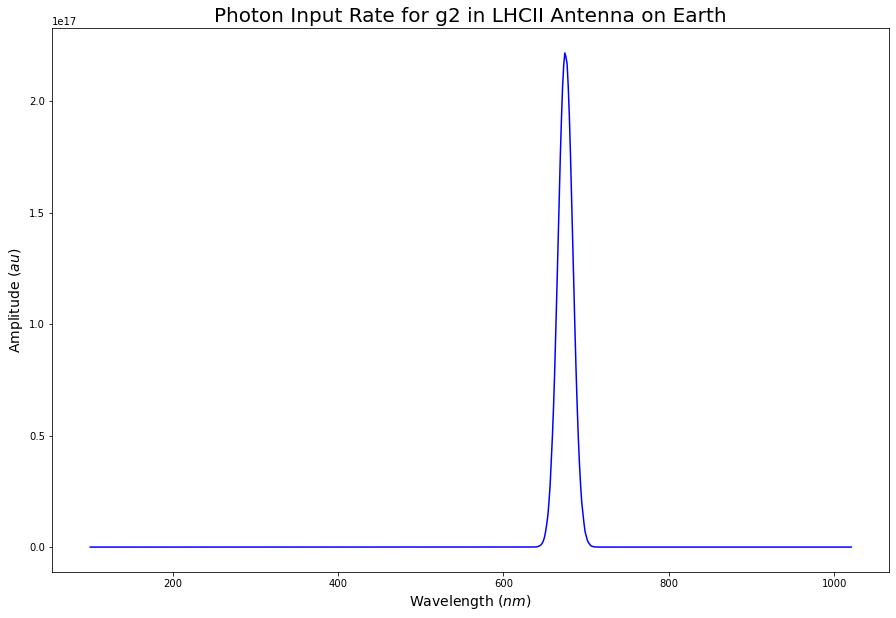

Photon Input Rate for LHCII g2 3.7624035215961276


In [3]:
import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from numpy import trapz
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
           FormatStrFormatter, AutoMinorLocator)
import math
import pandas as pd 

hc = 1.98644568E-25

res = 1

s_5800K_3 = []
s_5800K_4 = [] 


counter = 1

with open('fp_5800K.txt') as fp5800K, open('g2_LHCII_spectra_interp.txt') as g2_LHCII_spectra_interp, open('y2_5800_LHCII.txt', mode = 'w') as y2_5800_LHCII:
    for line1, line2 in zip(fp5800K, g2_LHCII_spectra_interp): #zip() aggregates your separate files in the brackets
        line1, line2 = line1.rstrip(), line2.rstrip() 
        col1, col2 = line1.split('\t'), line2.split('\t') #creates column 1 (wavelength, fp spectra) and column 2 (wavelength, LHCII absorption spectra)
        
        wavelength_5800K = float(col1[0]) #1st element in column 1 (could also do col2[0]) 
        product_5800K = float(col1[1])*float(col2[1])*((float(col1[0])*1E-9)/hc) #2nd element in column 1 (fp spectra) x 2nd element in column 2 (absorption spectra) x wavelength/hc
        
        counter = counter + 1 
                                        
        if counter%res == 0: 
            s_5800K_3.append(wavelength_5800K) 
            s_5800K_4.append(product_5800K) 
            
#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Photon Input Rate for g2 in LHCII Antenna on Earth', fontsize=20) 
ax.set_ylabel('Amplitude ($au$)', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(s_5800K_3,s_5800K_4,linestyle='-',color='b')

plt.savefig('Y2_5800K.pdf') 
plt.show() 

#Calculate Y2 (photon input rate for g2 domain)
int2 = np.trapz(s_5800K_4, s_5800K_3)

A1 = 0.43
A2 = 0.75
sigma = 7.5E-19 #metres squared
B = A1/A2 

y2 = sigma*int2
print('Photon Input Rate for LHCII g2', y2)

In [4]:
Yn = y1 + y2 #total photon input rate at sigma = 7.5e-19
print('Total photon input rate at absolute antenna cross-section of 7.5e-19 m sq:',Yn,'photons per second')

target_Yn = 100/0.85 #target total photon input to get 85% RC quantam yield of VRCeq = 100quanta/s
print('Target photon input rate:',target_Yn,'photons per second')

target_sigma = sigma*(target_Yn/Yn) #target absolute cross-section to get 85% RC quantam yield of VRCeq = 100quanta/s
print('Target absolute antenna cross-section to get total photon input of 117 quanta/s:',target_sigma,'metres squared')

Total photon input rate at absolute antenna cross-section of 7.5e-19 m sq: 5.88879778921295 photons per second
Target photon input rate: 117.64705882352942 photons per second
Target absolute antenna cross-section to get total photon input of 117 quanta/s: 1.4983583623685587e-17 metres squared
